### ML application

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./data/attempt2/merged_data_aqid.csv')

# Selecting specified rows for clustering analysis
selected_columns = ['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 
                    'rfr_raw', 'cfr_raw', 'drr_raw', 'ucw_raw', 'cep_raw', 
                    'udw_raw', 'usa_raw', 'rri_raw']
data_selected = data[selected_columns]

# Standardizing the selected data
scaler = StandardScaler()
data_selected_scaled = scaler.fit_transform(data_selected)

# applying the elbow method to determine the optimal number of clusters using the specified columns
inertia_selected = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters

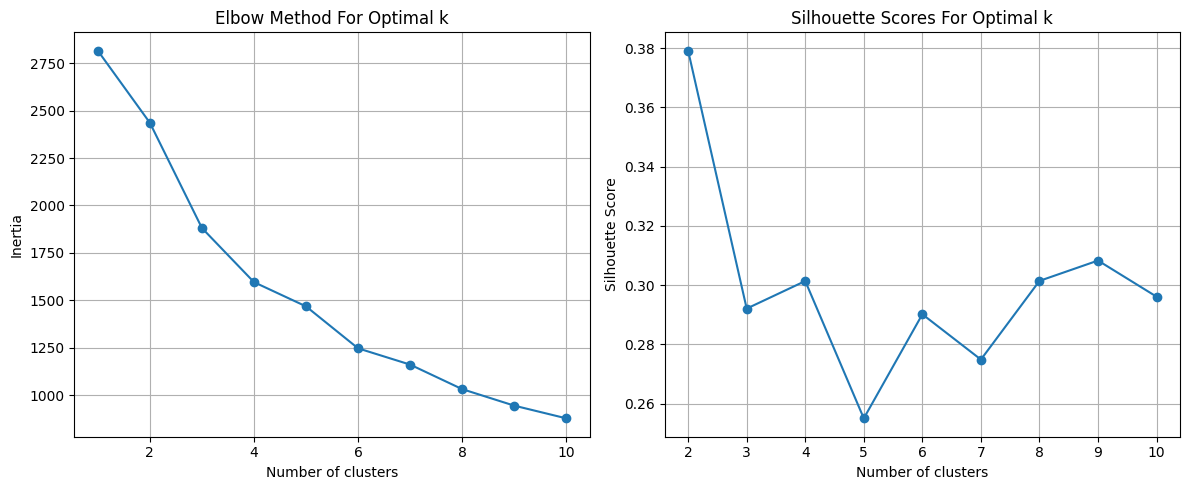

In [3]:
from sklearn.metrics import silhouette_score

# elbow and silhouette methods
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_selected_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:  # Silhouette score cannot be calculated with less than 2 clusters
        silhouette_scores.append(silhouette_score(data_selected_scaled, cluster_labels))

# Plotting the elbow plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

# Plotting the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores, marker='o')  # start from 2 clusters
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


##### The inertia decreases significantly as the number of clusters increases from 1 to 4. After 4 clusters, the rate of decrease slows down, suggesting that additional clusters do not provide as significant a decrease in inertia. The "elbow" point of the graph, where the rate of inertia decrease sharply changes, appears to be at 4 clusters. This is typically considered the optimal number of clusters when using the elbow method because it's the point before diminishing returns.

##### The silhouette score is highest when there are 2 clusters. The score takes a dip at 3 clusters, then rises again at 4 clusters but doesn't reach as high as it does for 2 clusters. The score generally trends downward from 4 clusters onwards, with some fluctuation.

In [4]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data_selected' is your dataframe with the selected columns for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Calculate metrics for a range of k clusters
for k in range(2, 11):  # Silhouette, Davies-Bouldin, and Calinski-Harabasz aren't defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    
    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(data_scaled, labels)
    
    # Calculate Davies-Bouldin Score
    davies_bouldin = davies_bouldin_score(data_scaled, labels)
    
    # Calculate Calinski-Harabasz Score
    calinski_harabasz = calinski_harabasz_score(data_scaled, labels)
    
    print(f"For n_clusters={k}, Silhouette score={silhouette_avg}, Davies-Bouldin score={davies_bouldin}, "
          f"Calinski-Harabasz score={calinski_harabasz}")


For n_clusters=2, Silhouette score=0.379150380507165, Davies-Bouldin score=1.206485372863972, Calinski-Harabasz score=39.61515528449701
For n_clusters=3, Silhouette score=0.2920998213598359, Davies-Bouldin score=1.1287691519253966, Calinski-Harabasz score=62.860789329185366
For n_clusters=4, Silhouette score=0.30140457207692894, Davies-Bouldin score=1.1391331307983619, Calinski-Harabasz score=64.2180817922382
For n_clusters=5, Silhouette score=0.2550555691896445, Davies-Bouldin score=1.427094317157818, Calinski-Harabasz score=57.61081108262075
For n_clusters=6, Silhouette score=0.29018477682089094, Davies-Bouldin score=1.2775516732517338, Calinski-Harabasz score=62.91789070452078
For n_clusters=7, Silhouette score=0.2748997025070552, Davies-Bouldin score=1.2937095007559098, Calinski-Harabasz score=59.14535505970812
For n_clusters=8, Silhouette score=0.30145427663350877, Davies-Bouldin score=1.0865744334406657, Calinski-Harabasz score=61.261765870962996
For n_clusters=9, Silhouette scor

1. Elbow Method: The point after which the inertia decrease is less sharp, indicating diminishing returns by adding more clusters. In the plot you provided, the elbow seemed to be at 4 clusters.
2. Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters. The highest silhouette score was at 2 clusters, but 4 clusters also showed a relatively high score compared to other cluster numbers.
3. Davies-Bouldin Index: Lower scores indicate better clustering, and the lowest score you've provided is for 9 clusters.
4. Calinski-Harabasz Index: Higher scores are better, and 3 or 4 clusters had the highest scores.
To select the optimal number of clusters:



1. 2 clusters have the highest silhouette score, suggesting well-defined clusters but may be too coarse.
2. 3 clusters were not notably indicated by any metric as the optimal number.
3. 4 clusters provide a good balance with a high silhouette score, one of the highest Calinski-Harabasz scores, and a noticeable 'elbow' in the plot.
4. 9 clusters have the best Davies-Bouldin score, indicating clear separation, but this might be too fine a division, potentially overfitting and creating clusters out of noise in the data.

Given the evidence from the metrics, 4 clusters seems like a reasonable compromise across the different measures of cluster quality. This number of clusters balances the overall cohesion and separation of the clusters without overcomplicating the model with too many clusters.

Silhouette Score: 0.30140457207692894
Davies-Bouldin Score: 1.1391331307983619
Calinski-Harabasz Score: 64.2180817922382


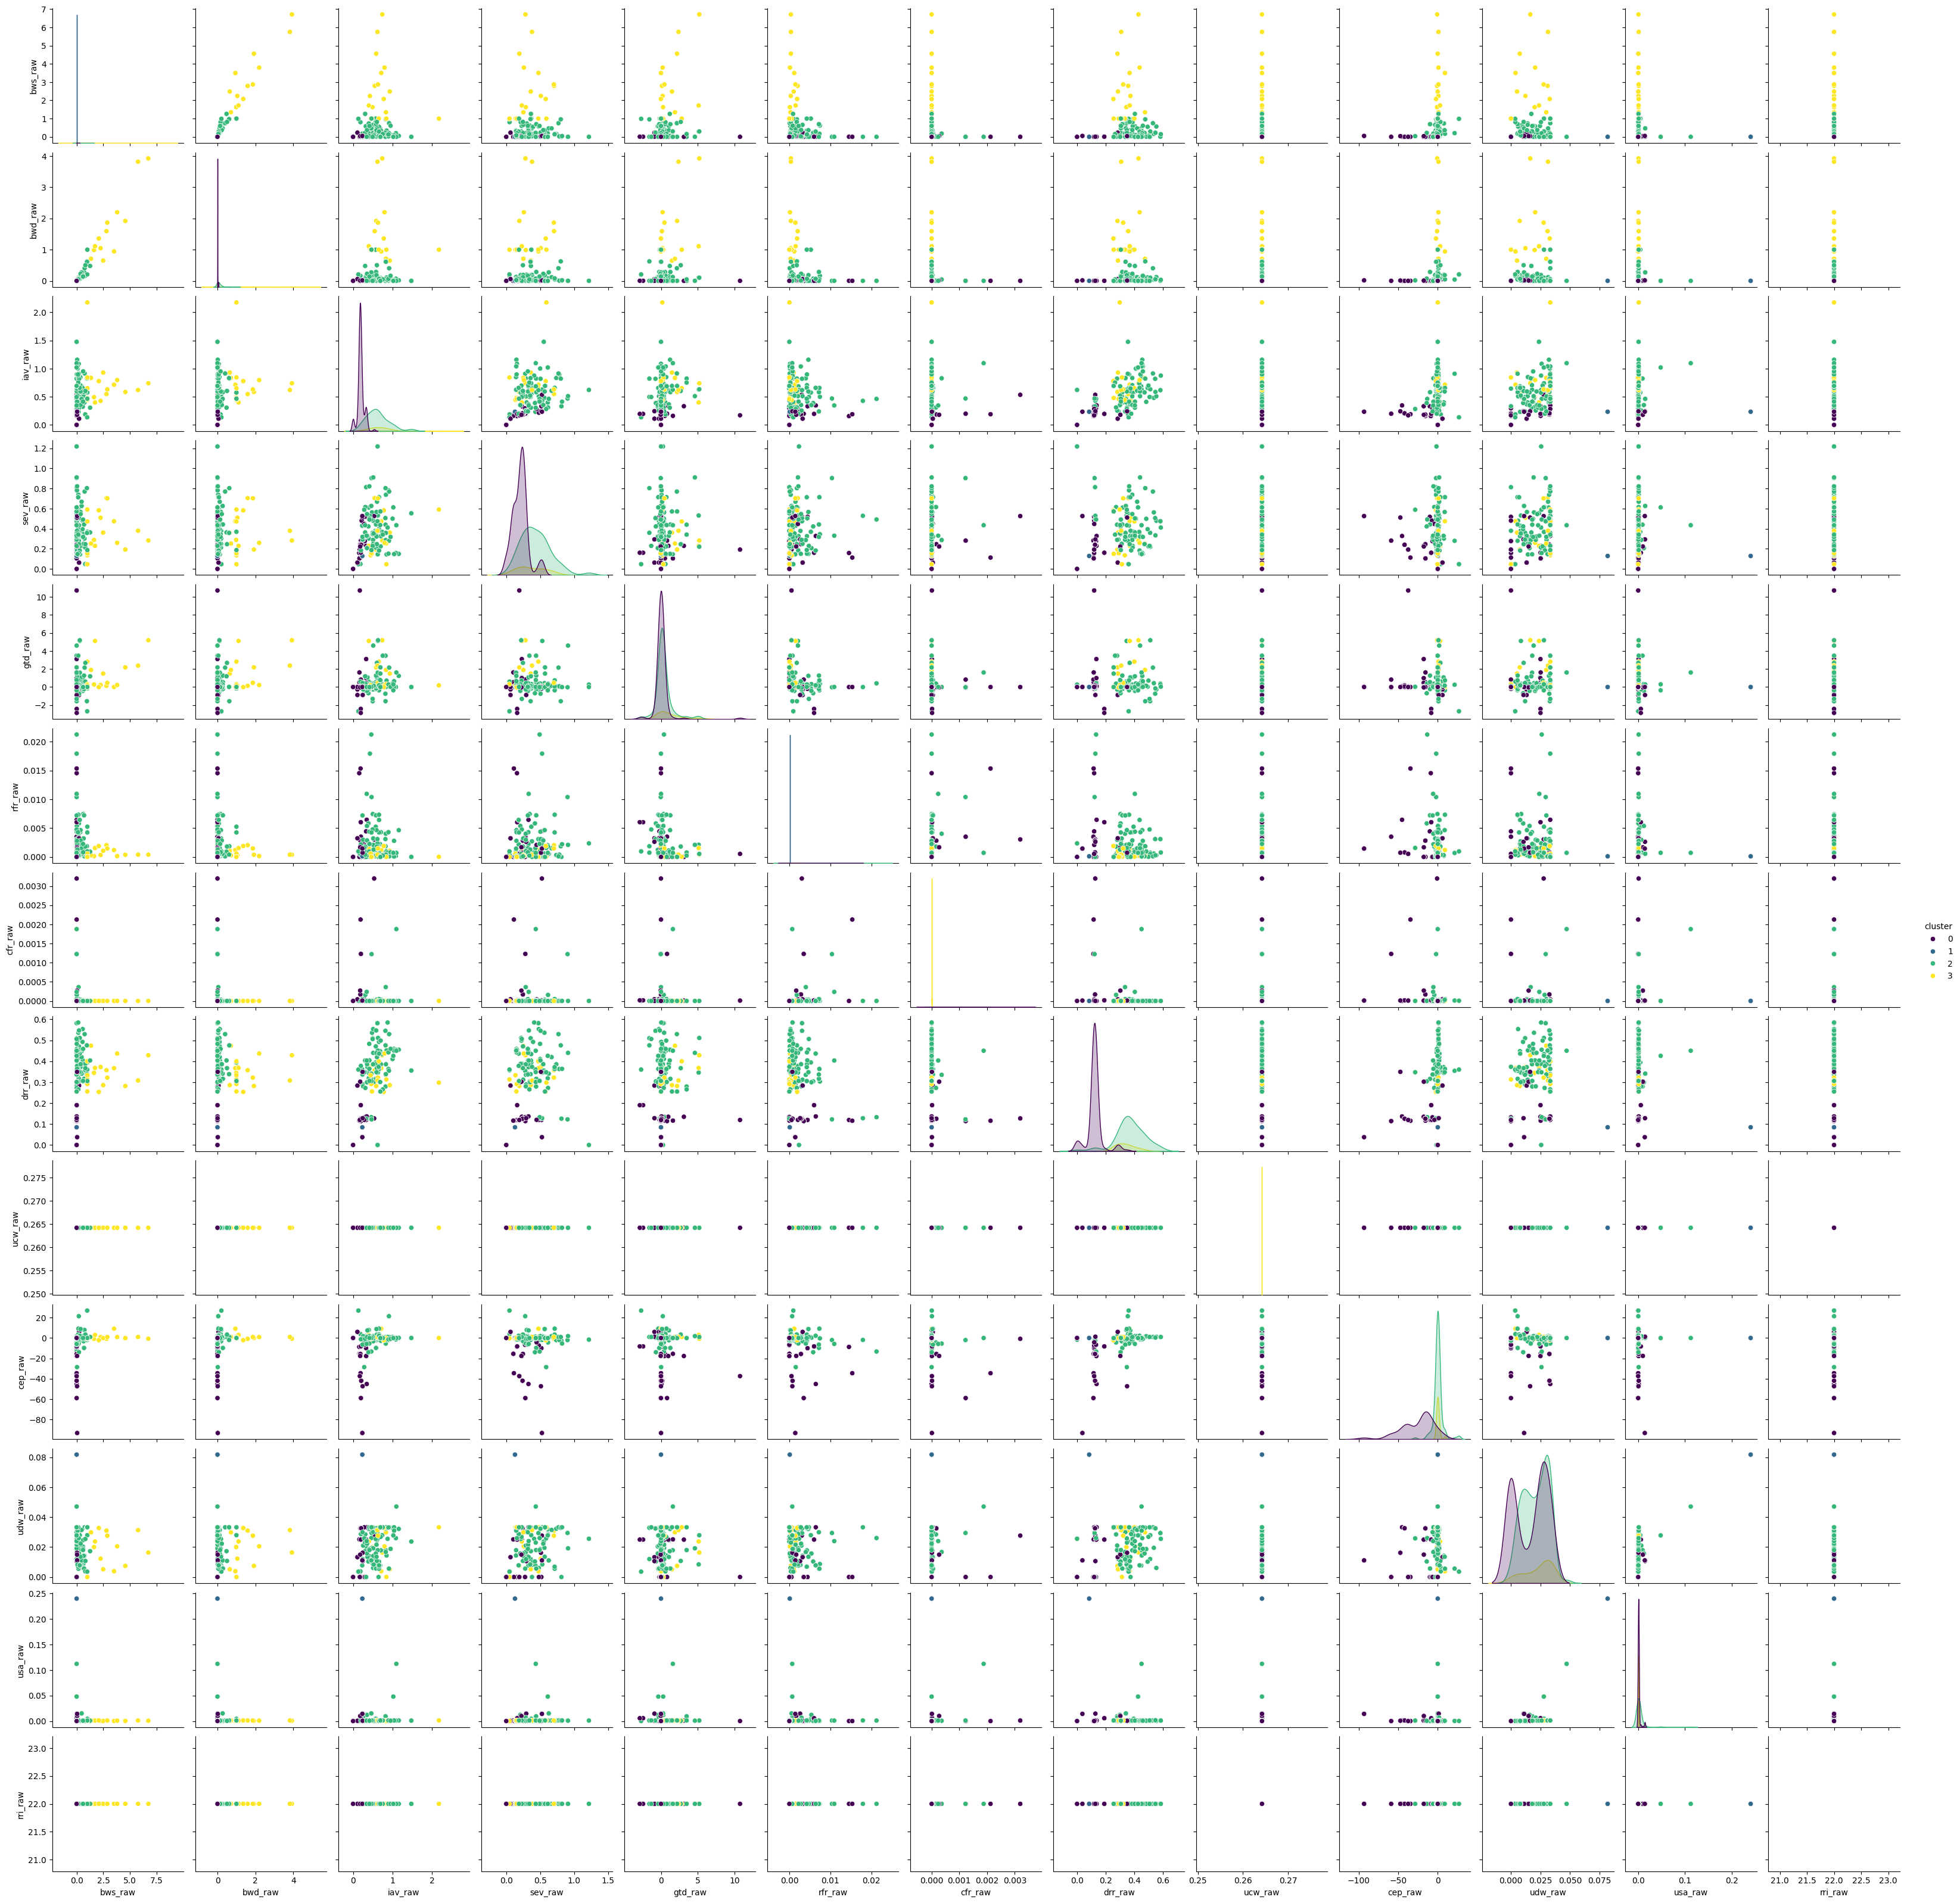

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# data_selected = pd.read_csv('your_dataset.csv')[selected_columns]

# Standardize the data
scaler = StandardScaler()
data_selected_scaled = scaler.fit_transform(data_selected)

# Cluster the data
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data_selected_scaled)

# Evaluate the clustering
silhouette_avg = silhouette_score(data_selected_scaled, labels)
davies_bouldin = davies_bouldin_score(data_selected_scaled, labels)
calinski_harabasz = calinski_harabasz_score(data_selected_scaled, labels)

# Print the evaluation scores
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')

# Add the cluster labels to your original dataframe for visualization
data_selected = data_selected.copy()
data_selected['cluster'] = labels

# Use pairplot to visualize the distribution of each feature by cluster
pairplot = sns.pairplot(data_selected, hue='cluster', palette='viridis')

# Show the plot
plt.show()


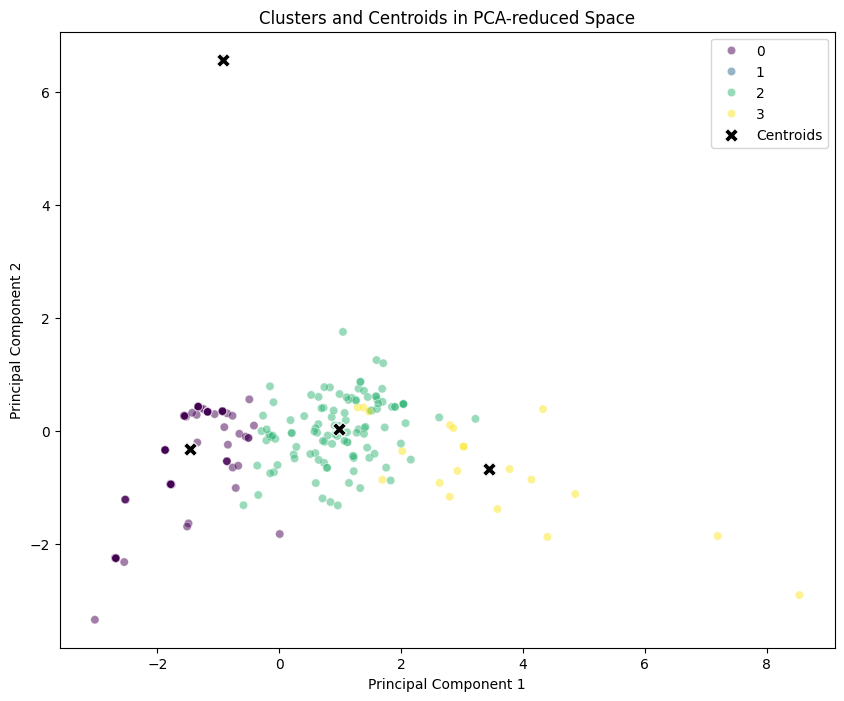

In [6]:
from sklearn.decomposition import PCA

# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_selected_scaled)

# Create a DataFrame with the PCA results
data_pca_df = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])
data_pca_df['cluster'] = labels

# Calculate the cluster centroids in the space of the first two principal components
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plotting the clusters along with the centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='cluster', data=data_pca_df, palette='viridis', alpha=0.5)

# Plot the centroids
sns.scatterplot(x=centroids_pca[:, 0], y=centroids_pca[:, 1], s=100, color='black', label='Centroids', marker='X')

plt.title('Clusters and Centroids in PCA-reduced Space')
plt.legend()
plt.show()


In [7]:



data['cluster'] = kmeans.fit_predict(data_selected_scaled)

import geopandas as gpd
import matplotlib.pyplot as plt

# Load US states map from a shapefile or GeoJSON file
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')


# Merge the geographic data with the clustering results
map_data = usa.set_index('NAME').join(data.set_index('state'))  # Adjust the index to match the 'state' column


# Option 1: Exclude Alaska and Hawaii for the contiguous US map
map_data_contiguous = map_data[~map_data.index.isin(['Alaska', 'Hawaii'])]

# Option 2: Reposition Alaska and Hawaii
map_data.loc[map_data.index == 'Alaska', 'geometry'] = map_data.loc[map_data.index == 'Alaska', 'geometry'].scale(.35, .35).translate(-35, -30)
map_data.loc[map_data.index == 'Hawaii', 'geometry'] = map_data.loc[map_data.index == 'Hawaii', 'geometry'].translate(54, -25)

# Check for NA values that might be causing plotting issues and remove or fix them
map_data = map_data.dropna(subset=['cluster'])

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
map_data_contiguous.plot(column='cluster', ax=ax, legend=True, cmap='RdYlBu', legend_kwds={'label': "Cluster by State", 'orientation': "horizontal"})

plt.title('USA Map Colored by Clusters')
plt.show()


ModuleNotFoundError: No module named 'geopandas'

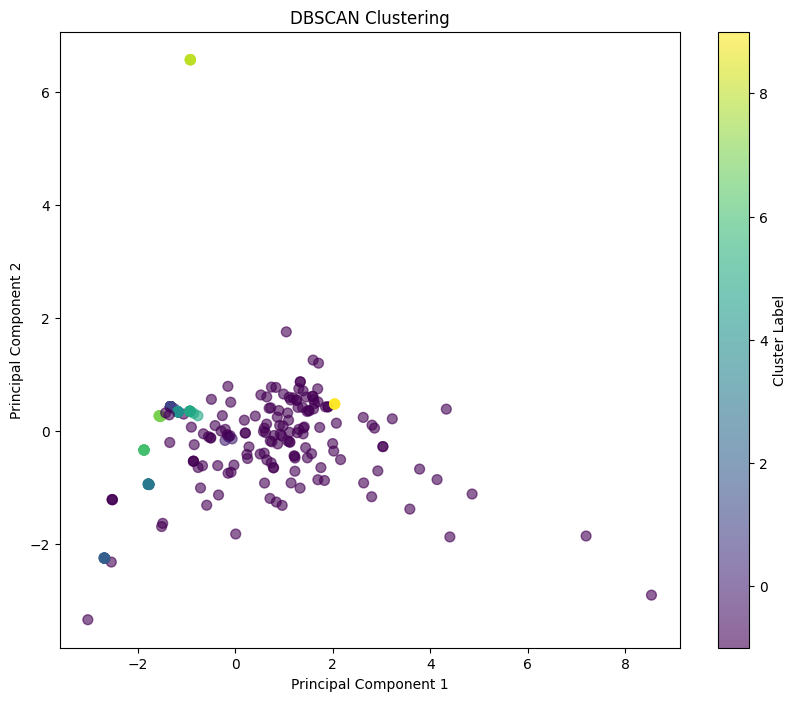

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./data/attempt2/merged_data_aqid.csv')

# Selecting specified rows for clustering analysis
selected_columns = ['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 
                    'rfr_raw', 'cfr_raw', 'drr_raw', 'ucw_raw', 'cep_raw', 
                    'udw_raw', 'usa_raw', 'rri_raw']
data_selected = data[selected_columns]

# For the purpose of DBSCAN, let's standardize the data
# DBSCAN is sensitive to the scale of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Perform DBSCAN clustering
# These are common initial parameters for DBSCAN, but they may need to be adjusted for your specific dataset
dbscan = DBSCAN(eps=0.5, min_samples=4)
clusters = dbscan.fit_predict(data_scaled)

# Reduce the data to two dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


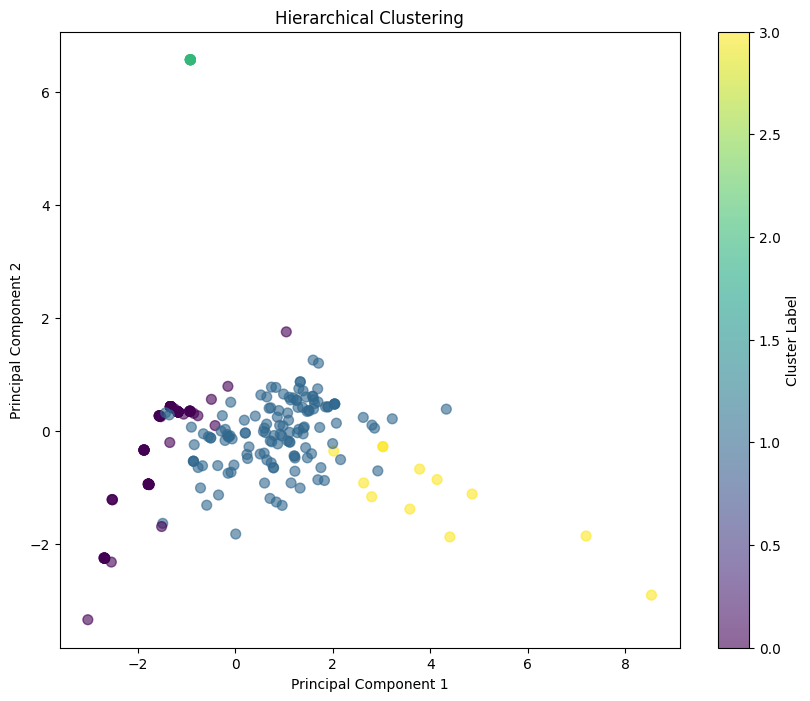

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('./data/attempt2/merged_data_aqid.csv')

# Selecting specified rows for clustering analysis
selected_columns = ['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 
                    'rfr_raw', 'cfr_raw', 'drr_raw', 'ucw_raw', 'cep_raw', 
                    'udw_raw', 'usa_raw', 'rri_raw']
data_selected = data[selected_columns]

# For the purpose of DBSCAN, let's standardize the data
# DBSCAN is sensitive to the scale of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)


# Perform hierarchical clustering
# When using 'ward' linkage, 'affinity' is always 'euclidean' and does not need to be set.
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = agg_clustering.fit_predict(data_scaled)


# Reduce the data to two dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



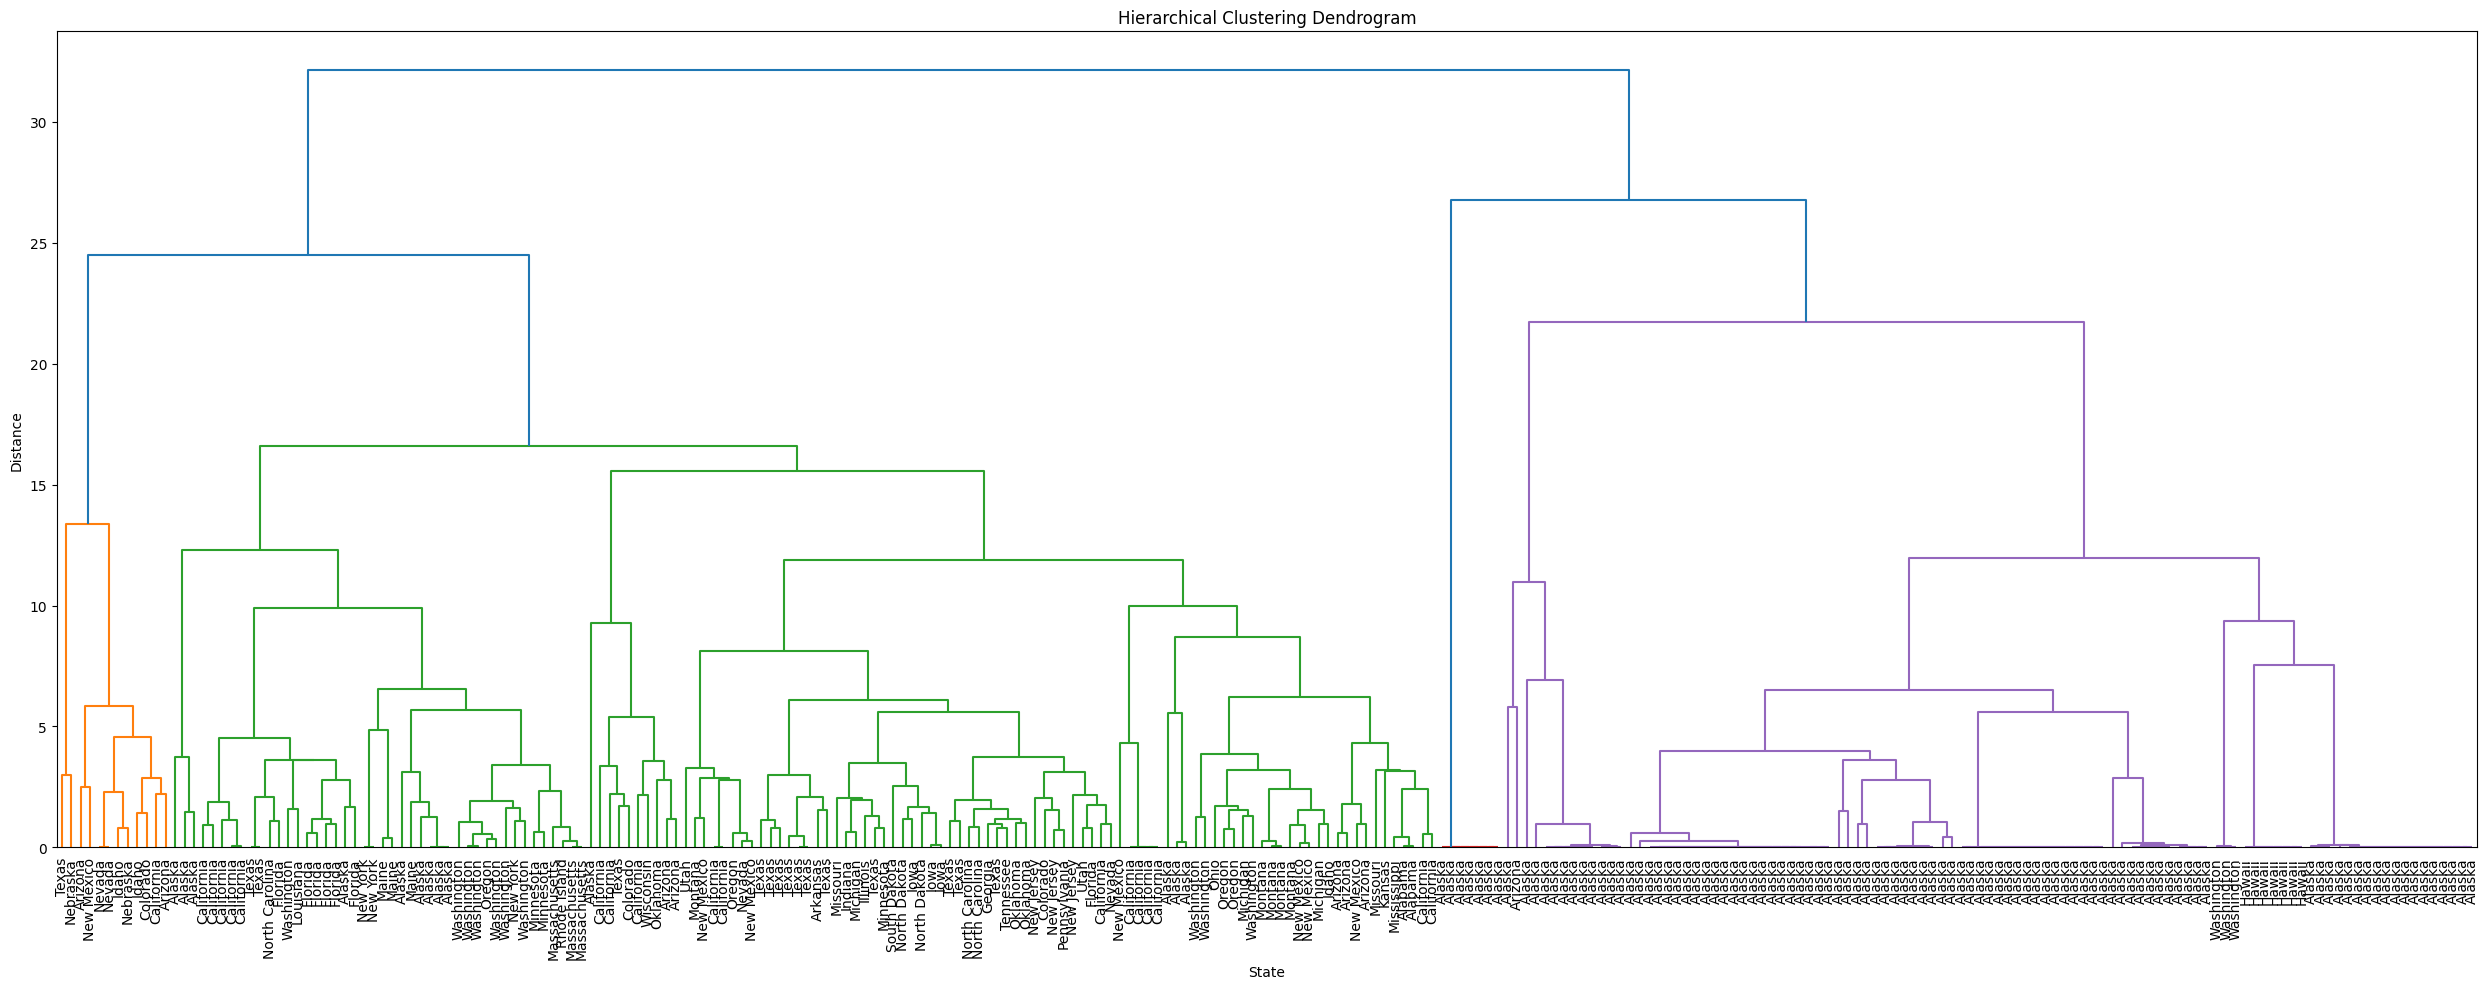

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
data_path = './data/attempt2/merged_data_aqid.csv'
data = pd.read_csv(data_path)

# Selecting specified rows for clustering analysis
selected_columns = ['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 
                    'rfr_raw', 'cfr_raw', 'drr_raw', 'ucw_raw', 'cep_raw', 
                    'udw_raw', 'usa_raw', 'rri_raw']
data_selected = data[selected_columns]

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Generate the linkage matrix
Z = linkage(data_scaled, method='ward')

# Create a figure with a defined size
plt.figure(figsize=(25, 10))

# Plot the dendrogram, label each leaf with the corresponding state name
dendrogram(
    Z,
    labels=data['state'].values,
    leaf_rotation=90,
    leaf_font_size=10
)

# Title and labels for the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('State')
plt.ylabel('Distance')

# Adjust the plot to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


0        Michigan
1         Arizona
2           Idaho
3            Utah
4           Idaho
          ...    
251       Arizona
252       Arizona
253    California
254    California
255        Hawaii
Name: state, Length: 256, dtype: object


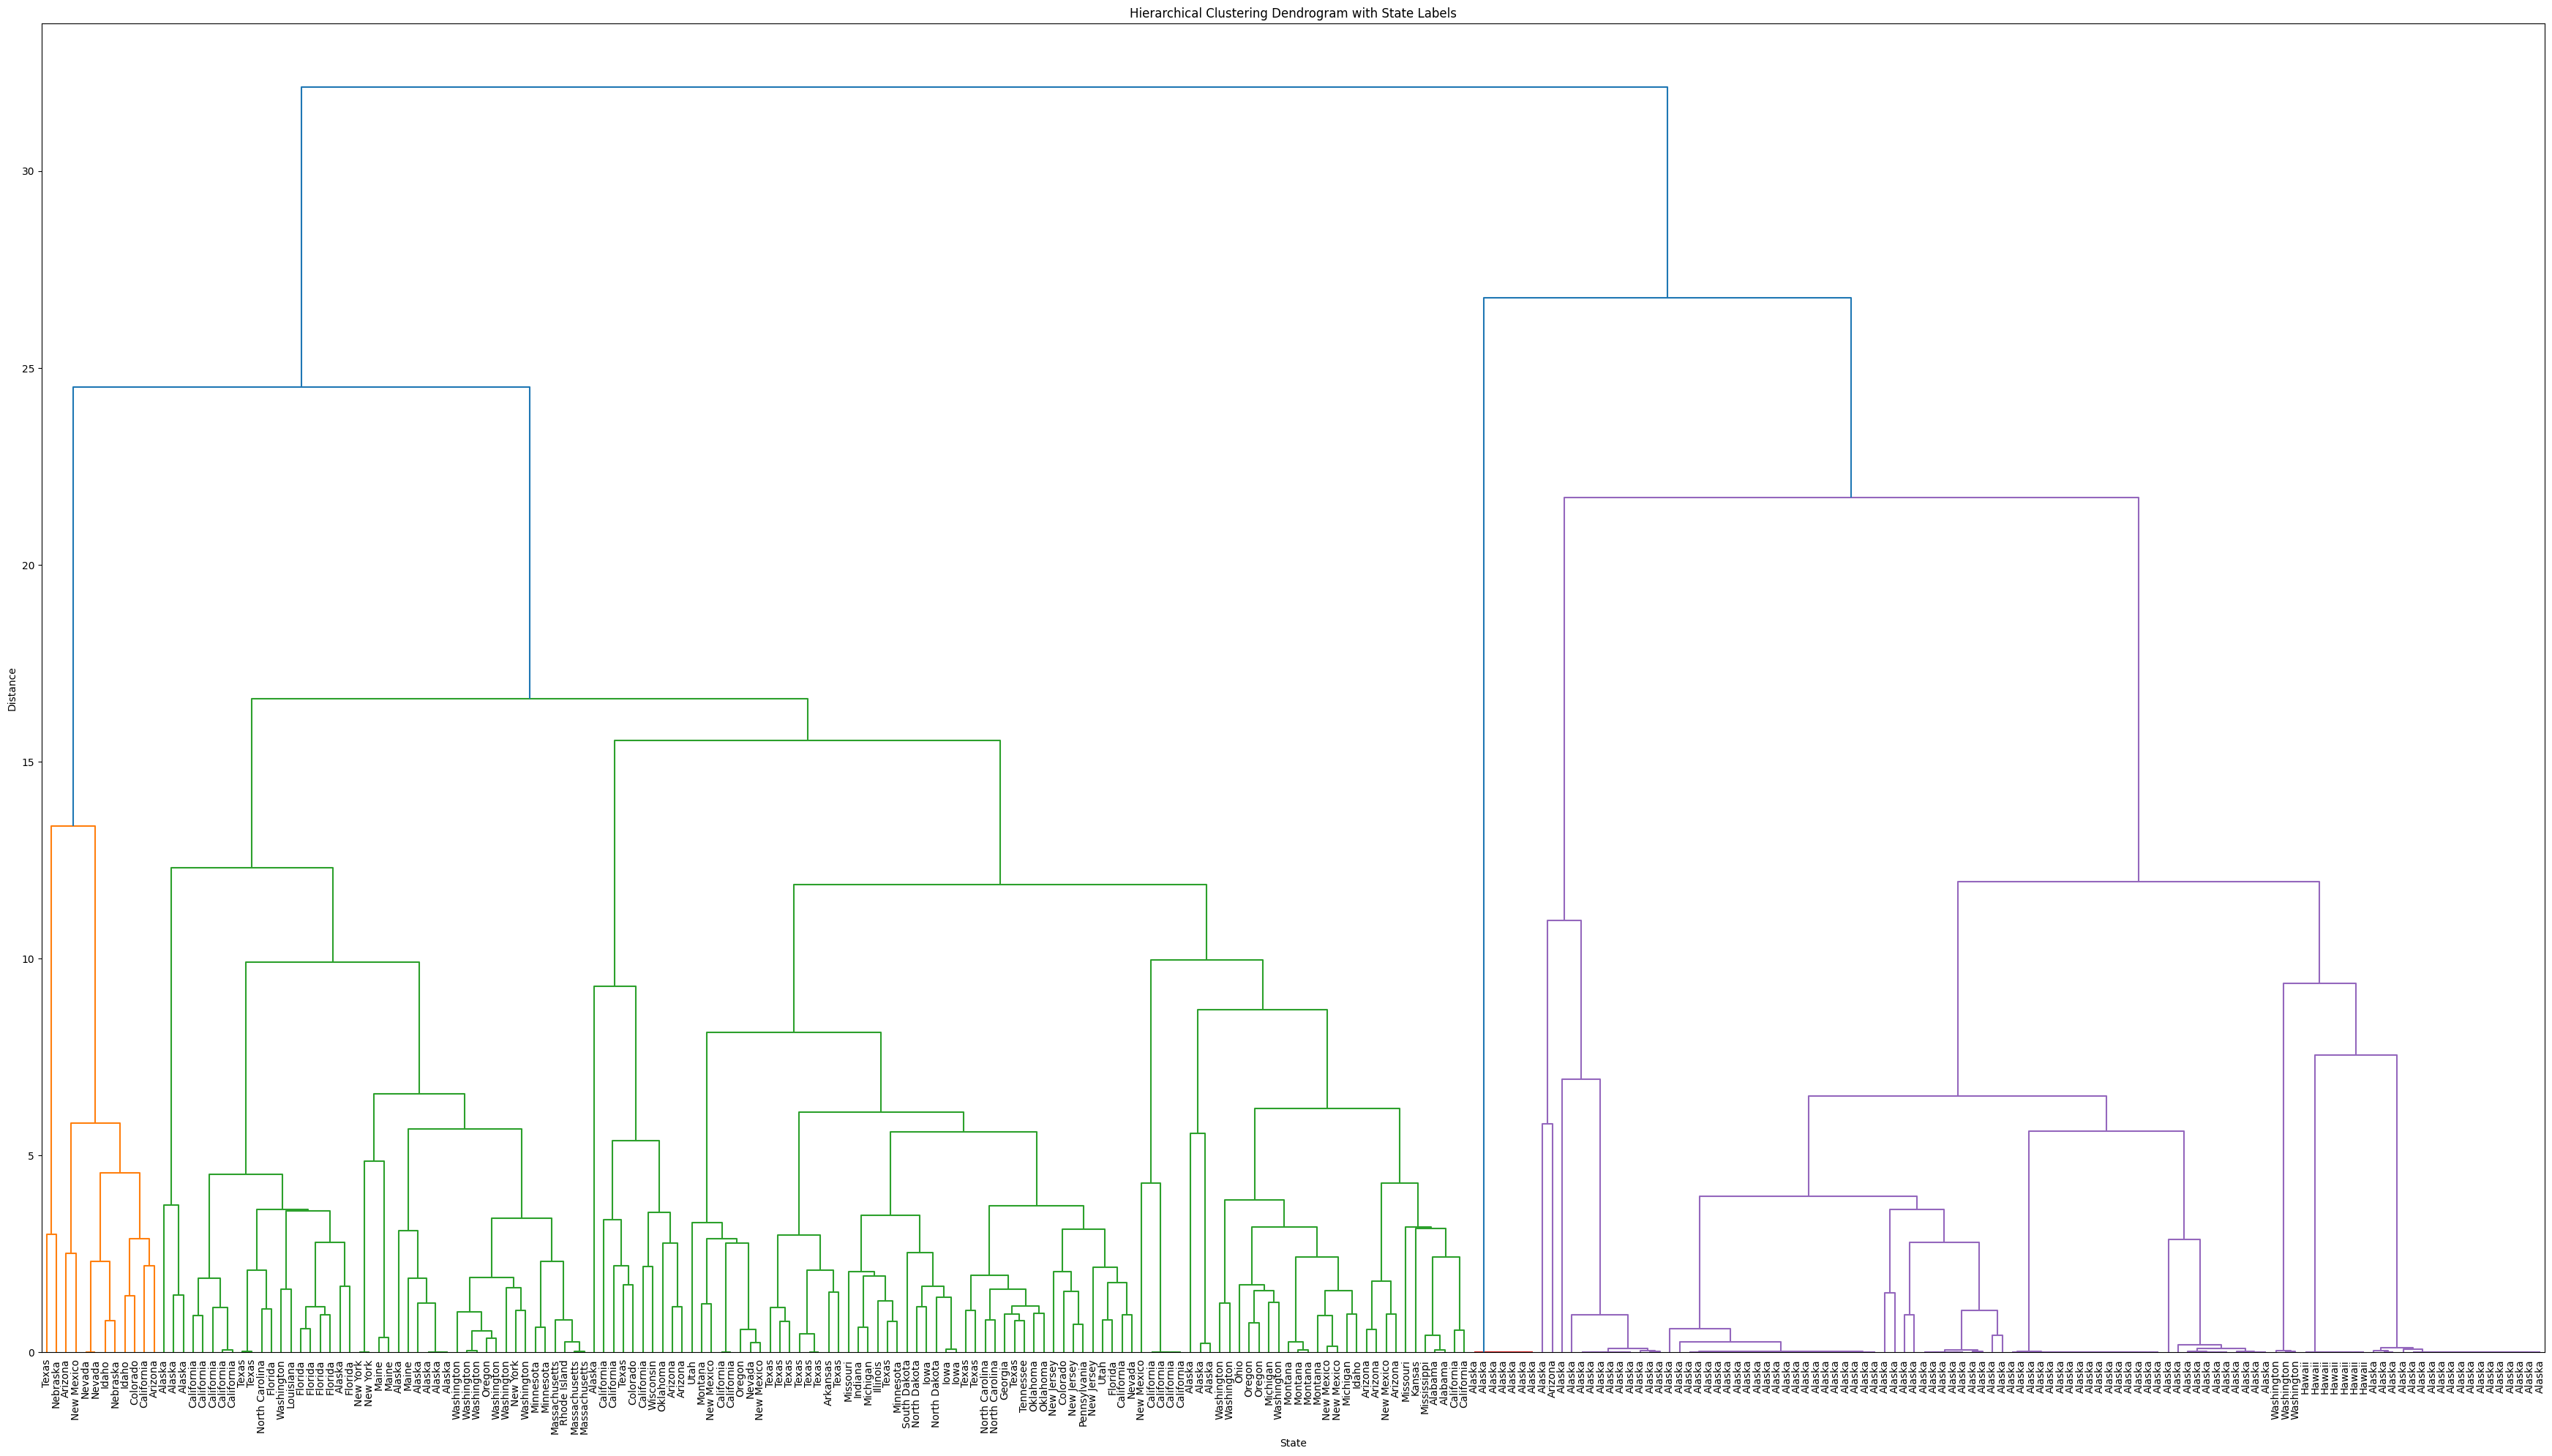

In [ ]:
# Make sure states is a Series or array-like
states = data['state']  # Assuming 'state' is the correct column name

# Check the content of states
print(states)

# Now let's plot the dendrogram again with the corrected labels
plt.figure(figsize=(35, 20))
dendrogram(
    Z,
    labels=states.to_numpy(),  # Convert to numpy array if it's not already
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title('Hierarchical Clustering Dendrogram with State Labels')
plt.xlabel('State')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/2413882937.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, method=method)


Gower Dunn Index: 0.28079283237457275


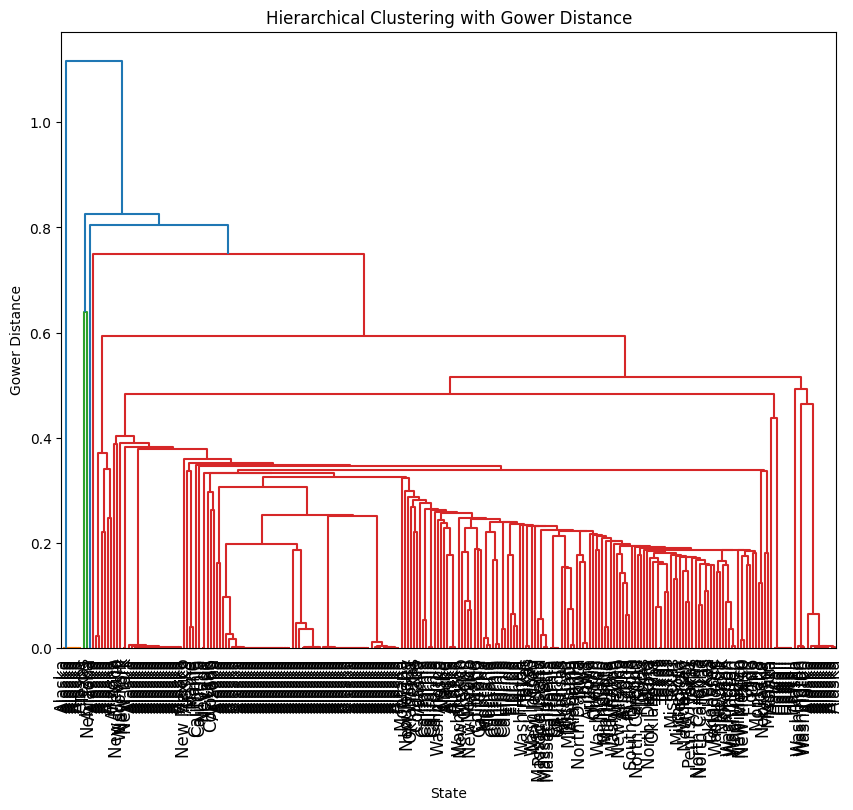

/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/2413882937.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, method=method)


Euclidean Dunn Index: 0.08989086678411366


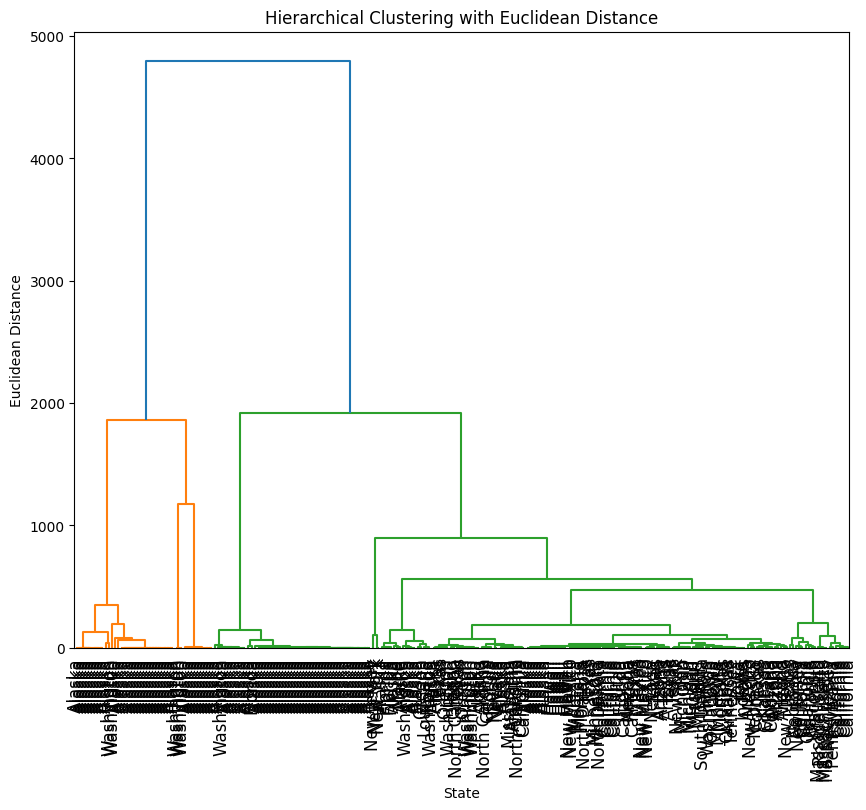

/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/2413882937.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, method=method)


Manhattan Dunn Index: 0.089430193863088


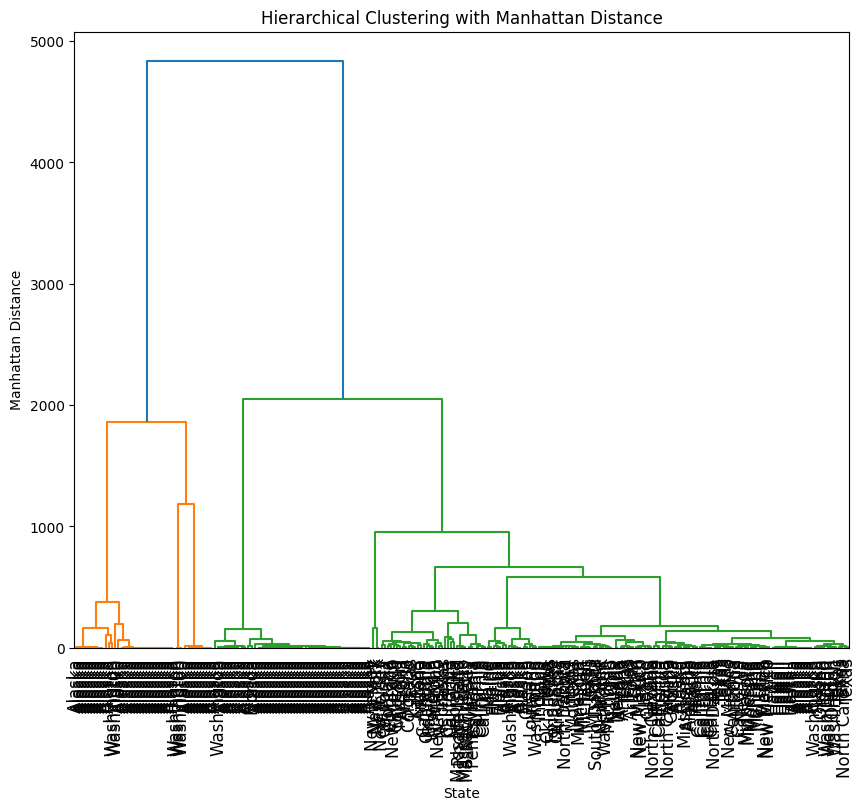

/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/2413882937.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix, method=method)


Chebyshev Dunn Index: 0.08849918430124917


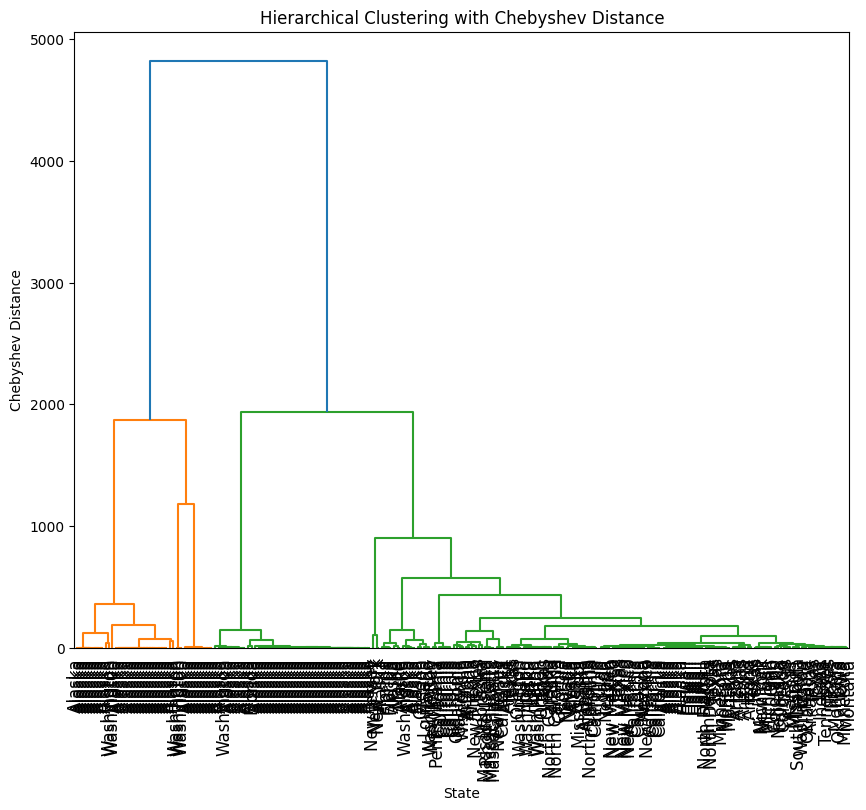

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from validclust import dunn
import gower

# Load the dataset
data_path = './data/attempt2/merged_data_aqid.csv'
data = pd.read_csv(data_path)

# Selecting specified rows for clustering analysis
selected_columns = ['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 
                    'rfr_raw', 'cfr_raw', 'drr_raw', 'ucw_raw', 'cep_raw', 
                    'udw_raw', 'usa_raw', 'rri_raw']
data_selected = data[selected_columns]

# Compute different distance matrices
gower_distance_matrix = gower.gower_matrix(data_selected)
euclidean_distance_matrix = squareform(pdist(data_selected, metric='euclidean'))
manhattan_distance_matrix = squareform(pdist(data_selected, metric='cityblock'))
chebyshev_distance_matrix = squareform(pdist(data_selected, metric='chebyshev'))

# Perform hierarchical clustering using each distance matrix
linkage_methods = ['single', 'average', 'complete', 'ward']  # 'ward' only for Euclidean
distances = {
    "Gower": gower_distance_matrix,
    "Euclidean": euclidean_distance_matrix,
    "Manhattan": manhattan_distance_matrix,
    "Chebyshev": chebyshev_distance_matrix
}
results = {}
for name, matrix in distances.items():
    if name == "Gower":
        method = 'single'  # Use 'single' for Gower due to non-Euclidean nature
    else:
        method = 'ward'  # Euclidean is suitable for 'ward'
    Z = linkage(matrix, method=method)
    clusters = fcluster(Z, 5, criterion='maxclust')  # Example: 5 clusters
    dunn_index = dunn(matrix, clusters)
    results[name] = dunn_index
    print(f"{name} Dunn Index: {dunn_index}")

    # Plot dendrogram for each distance measure
    plt.figure(figsize=(10, 8))
    dendrogram(Z, labels=data['state'].values, leaf_rotation=90, leaf_font_size=12)
    plt.title(f'Hierarchical Clustering with {name} Distance')
    plt.xlabel('State')
    plt.ylabel(f'{name} Distance')
    plt.show()


##### The clustering result using Gower distance is significantly better according to the Dunn index, indicating more distinct and compact clusters compared to those generated using the other three distance measures. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import fcluster, linkage
from validclust import dunn
import gower

# Load the dataset
data_path = './data/attempt2/merged_data_aqid.csv'
data = pd.read_csv(data_path)

# Selecting specified rows for clustering analysis
selected_columns = ['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 
                    'rfr_raw', 'cfr_raw', 'drr_raw', 'ucw_raw', 'cep_raw', 
                    'udw_raw', 'usa_raw', 'rri_raw']
data_selected = data[selected_columns]

# Preprocessing variations
preprocessings = {
    "Raw Data": data_selected,
    "Normalized Data": MinMaxScaler().fit_transform(data_selected),
    "Standardized Data": StandardScaler().fit_transform(data_selected),
    "Binary Encoding": pd.get_dummies(data_selected)
}

# Calculate Dunn index for each preprocessing
results = {}
for name, preprocessed_data in preprocessings.items():
    # Ensure proper handling of non-numeric data in gower_distance_matrix calculation
    if isinstance(preprocessed_data, pd.DataFrame):
        matrix = preprocessed_data.to_numpy()
    else:
        matrix = preprocessed_data
    
    # Compute Gower distance matrix
    gower_distance_matrix = gower.gower_matrix(matrix)
    
    # Perform hierarchical clustering
    Z = linkage(gower_distance_matrix, method='single')
    clusters = fcluster(Z, 5, criterion='maxclust')
    
    # Calculate Dunn index
    dunn_index = dunn(gower_distance_matrix, clusters)
    results[name] = dunn_index

# Print results
for preprocessing, dunn_index in results.items():
    print(f"{preprocessing} Dunn Index: {dunn_index}")


Raw Data Dunn Index: 0.28079283237457275
Normalized Data Dunn Index: 0.28079283237457275
Standardized Data Dunn Index: 0.28079280257225037
Binary Encoding Dunn Index: 0.28079283237457275


/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/3942682607.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_distance_matrix, method='single')


/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/1583074470.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_distance_matrix, method=method)


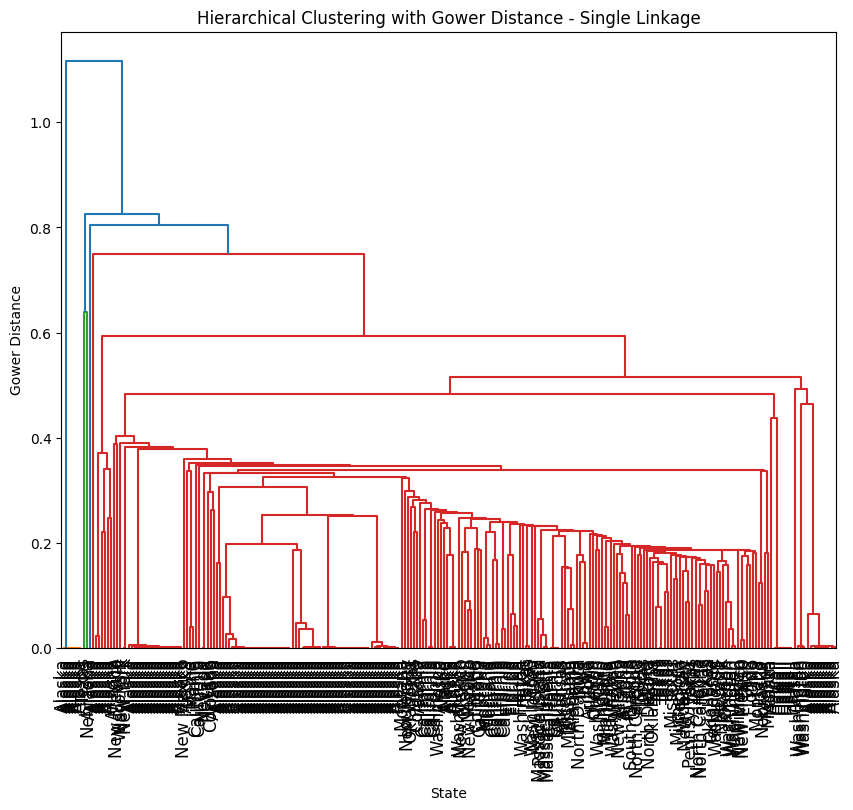

/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/1583074470.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_distance_matrix, method=method)


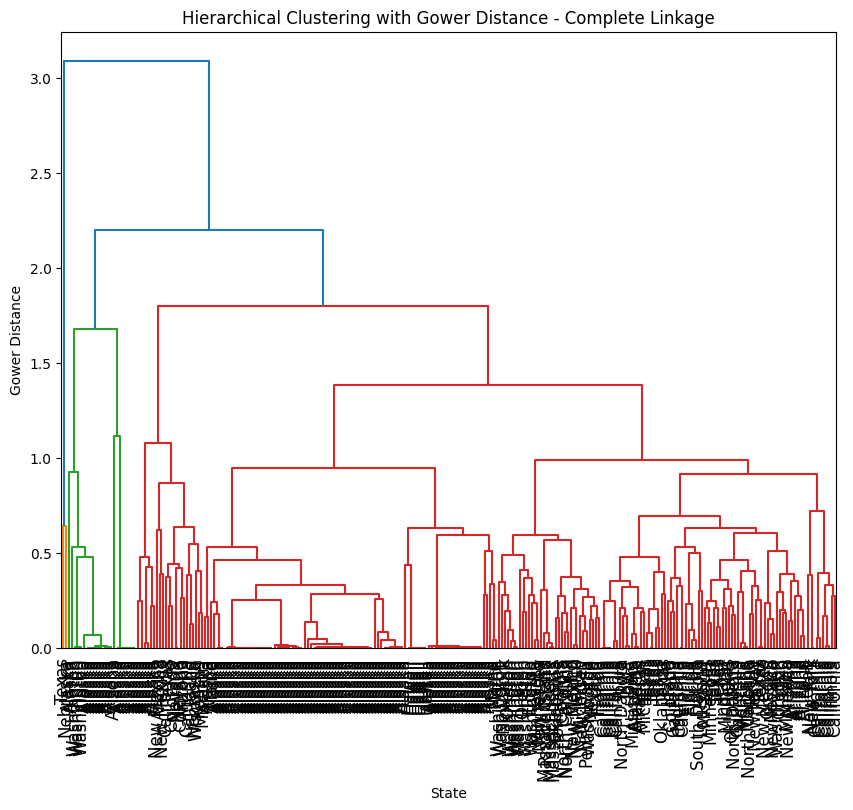

/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/1583074470.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_distance_matrix, method=method)


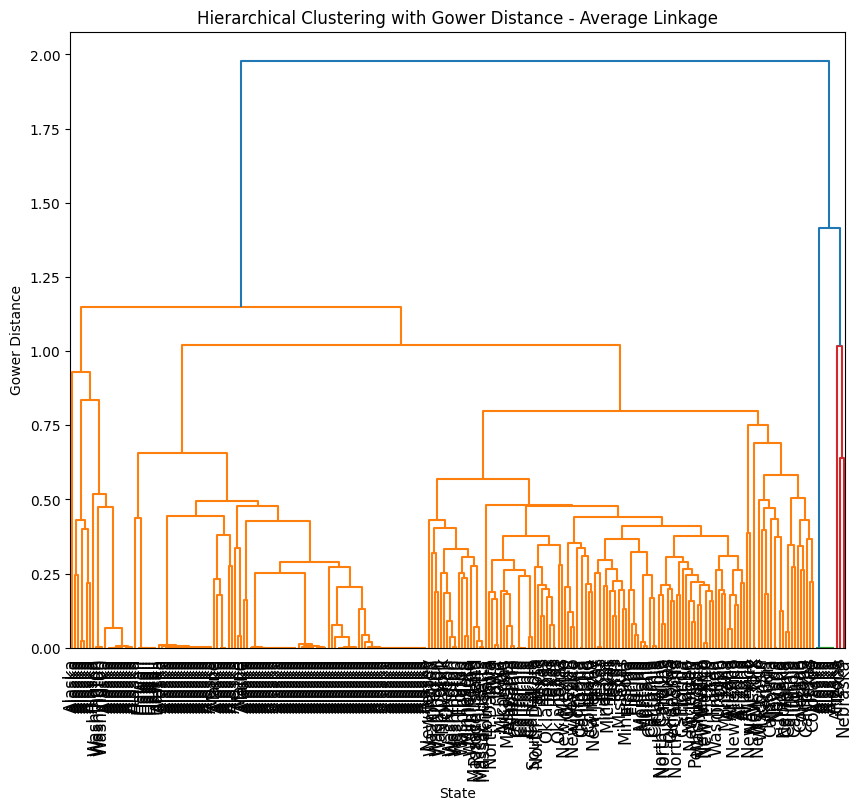

/var/folders/gk/2r1vldd52g3frkt75nnk9vb00000gn/T/ipykernel_62211/1583074470.py:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_distance_matrix, method=method)


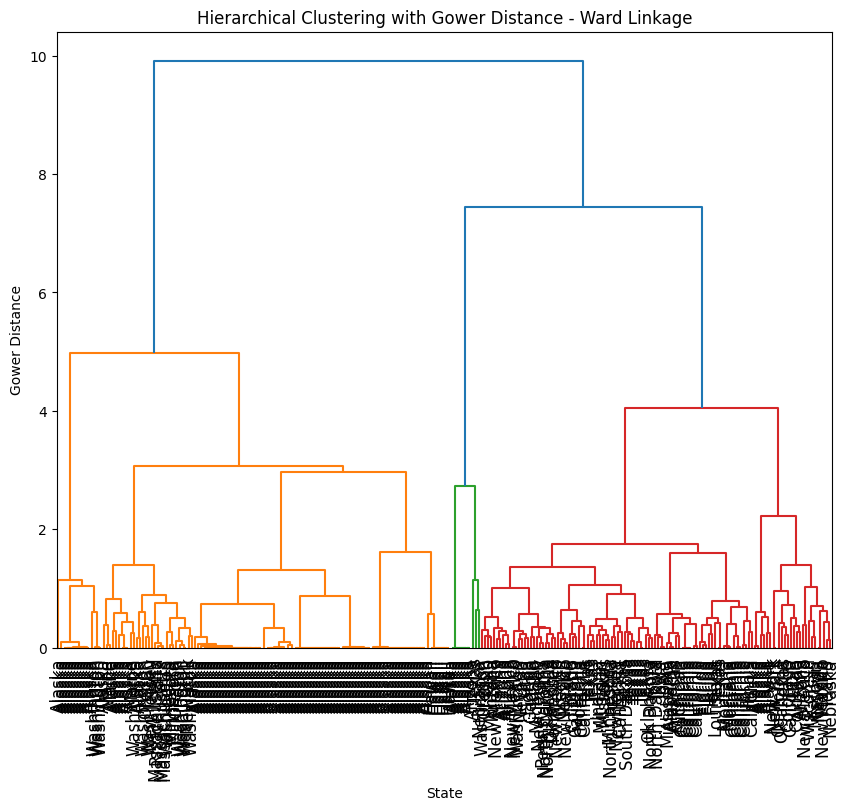

Dunn Index using Single linkage: 0.28079283237457275
Dunn Index using Complete linkage: 0.14512215554714203
Dunn Index using Average linkage: 0.1057419404387474
Dunn Index using Ward linkage: 0.05636155232787132


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import gower
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from validclust import dunn
import matplotlib.pyplot as plt

# Load the dataset
data_path = './data/attempt2/merged_data_aqid.csv'
data = pd.read_csv(data_path)

# Selecting specified rows for clustering analysis
selected_columns = ['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 
                    'rfr_raw', 'cfr_raw', 'drr_raw', 'ucw_raw', 'cep_raw', 
                    'udw_raw', 'usa_raw', 'rri_raw']
data_selected = data[selected_columns]

# Normalize the data (considering all data is numeric for normalization)
data_normalized = MinMaxScaler().fit_transform(data_selected)

# Compute Gower distance matrix
gower_distance_matrix = gower.gower_matrix(data_normalized)

# Different linkage methods to test
linkage_methods = ['single', 'complete', 'average', 'ward']
results = {}

for method in linkage_methods:
    # Perform hierarchical clustering
    Z = linkage(gower_distance_matrix, method=method)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 8))
    dendrogram(Z, labels=data['state'].values, leaf_rotation=90, leaf_font_size=12)
    plt.title(f'Hierarchical Clustering with Gower Distance - {method.capitalize()} Linkage')
    plt.xlabel('State')
    plt.ylabel('Gower Distance')
    plt.show()
    
    # Determine clusters
    clusters = fcluster(Z, 5, criterion='maxclust')
    
    # Calculate Dunn index
    dunn_index = dunn(gower_distance_matrix, clusters)
    results[method] = dunn_index

# Print results
for method, index in results.items():
    print(f"Dunn Index using {method.capitalize()} linkage: {index}")